# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile as zf
import re

# Analyzing Data Set

## Reading Dataset

In [5]:
archive = zf.ZipFile('../data/StackOverflowSurvey2023.zip')
file = archive.open('survey.csv')
sodf = pd.read_csv(file)

__Analyzing the columns to find important data__

In [7]:
sodf.columns.tolist()

['ResponseId',
 'Q120',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'TechList',
 'BuyNewTool',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'NEWSO

The most important columns are "LanguageHaveWorkedWith" and "LanguageWantToWorkWith"

In [9]:
pd.options.display.max_columns = None

In [10]:
sodf.head(10)

ResponseId     Q120                                         MainBranch  \
0           1  I agree                                      None of these   
1           2  I agree                     I am a developer by profession   
2           3  I agree                     I am a developer by profession   
3           4  I agree                     I am a developer by profession   
4           5  I agree                     I am a developer by profession   
5           6  I agree                     I am a developer by profession   
6           7  I agree                     I am a developer by profession   
7           8  I agree                     I am a developer by profession   
8           9  I agree  I am not primarily a developer, but I write co...   
9          10  I agree                     I am a developer by profession   

               Age                                         Employment  \
0  18-24 years old                                                NaN   
1  25-34 years old                                Employed, full-time   
2  45-54 years old                                Employed, full-time   
3  25-34 years old                                Employed, full-time   
4  25-34 years old  Employed, full-time;Independent contractor, fr...   
5  35-44 years old                                Employed, full-time   
6  35-44 years old                                Employed, full-time   
7  25-34 years old                                Employed, full-time   
8  45-54 years old                                Employed, full-time   
9  25-34 years old                 Not employed, but looking for work   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   
6                                Remote   
7                                Remote   
8  Hybrid (some remote, some in-person)   
9                                   NaN   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   
5  Hobby;Professional development or self-paced l...   
6  Hobby;Contribute to open-source projects;Profe...   
7                                              Hobby   
8           Hobby;Contribute to open-source projects   
9                                                NaN   

                                             EdLevel  \
0                                                NaN   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5  Some college/university study without earning ...   
6  Some college/university study without earning ...   
7       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
8    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
9       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   
5  Books / Physical media;Colleague;Online Course...   
6  Friend or family member;Online Courses or Cert...   
7  Books / Physical media;Online Courses or Certi...   
8  Online Courses or Certification;On the job tra...   
9  Books / Physical media;Online Courses or Certi...   

                          

In [11]:
sodf.shape

(89184, 84)

In [12]:
sodf.describe()

ResponseId     CompTotal       WorkExp  ConvertedCompYearly
count  89184.000000  4.822500e+04  43579.000000         4.801900e+04
mean   44592.500000  1.036807e+42     11.405126         1.031101e+05
std    25745.347541  2.276847e+44      9.051989         6.814188e+05
min        1.000000  0.000000e+00      0.000000         1.000000e+00
25%    22296.750000  6.300000e+04      5.000000         4.390700e+04
50%    44592.500000  1.150000e+05      9.000000         7.496300e+04
75%    66888.250000  2.300000e+05     16.000000         1.216410e+05
max    89184.000000  5.000000e+46     50.000000         7.435143e+07

## Making a remove all function for no good reason...

In [14]:
def remove_all(list, item): 
    count = list.count(item) 
    for i in range(count): 
        list.remove(item) 
    return list 

## Finding and counting all the languages in the important columns very inefficiently

In [16]:
langs = []
responses = remove_all(sodf['LanguageHaveWorkedWith'].to_list(), np.nan)
for response in responses:
    temp_langs = re.findall("[^;]+", response)
    for lang in temp_langs:
        if not lang in langs:
            langs.append(lang)

counts = [0] * (len(langs))
for response in responses:
    temp_langs = re.findall("[^;]+", response)
    for lang in temp_langs:
        index = langs.index(lang)
        counts[index] += 1
        
users_df = pd.DataFrame(data={'Language':langs,'Count':counts})
users_df = users_df.sort_values('Language')

In [17]:
langs = []
responses = remove_all(sodf['LanguageWantToWorkWith'].to_list(), np.nan)
for response in responses:
    temp_langs = re.findall("[^;]+", response)
    for lang in temp_langs:
        if not lang in langs:
            langs.append(lang)

counts = [0] * (len(langs))
for response in responses:
    temp_langs = re.findall("[^;]+", response)
    for lang in temp_langs:
        index = langs.index(lang)
        counts[index] += 1
        
desired_df = pd.DataFrame(data={'Language':langs,'Count':counts})
desired_df = desired_df.sort_values('Language')

## Simple Plotting

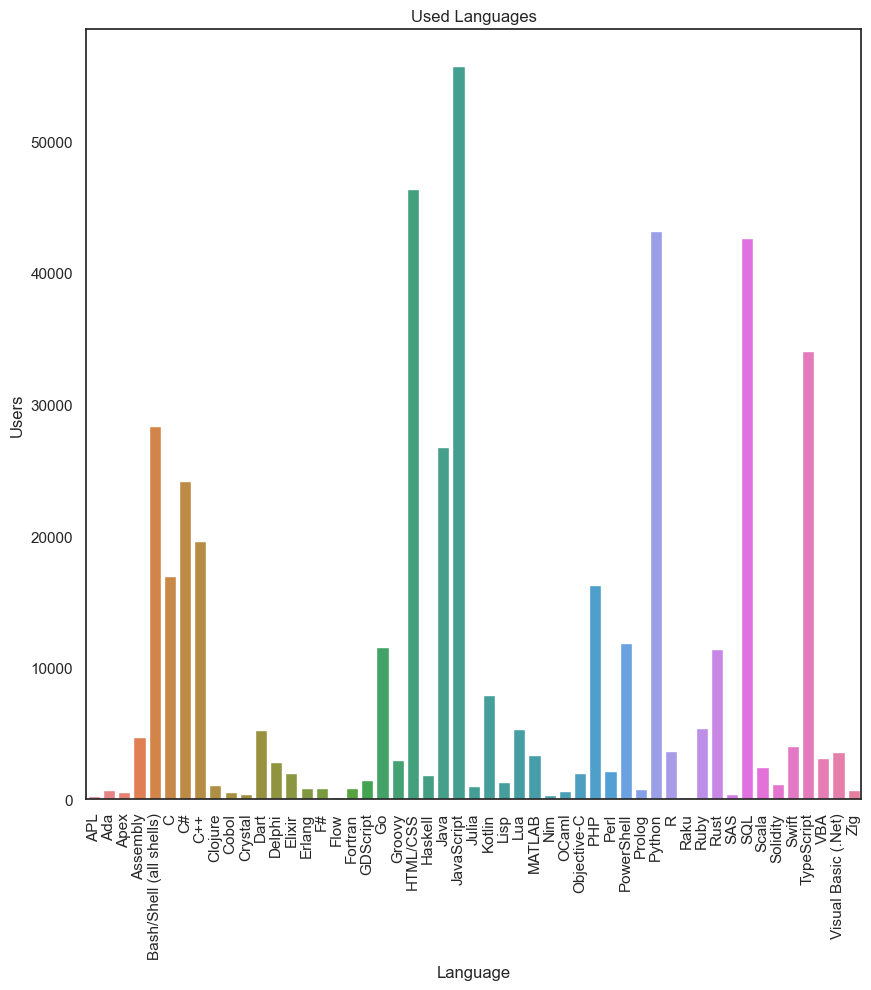

In [19]:
sns.set_theme(style='white', rc={'figure.figsize':(10,10)})
graph = sns.barplot(data=users_df, x='Language', y='Count', hue='Language')
graph.set_xticks(graph.get_xticks())
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_ylabel('Users')
graph.set_title('Used Languages')
plt.show()

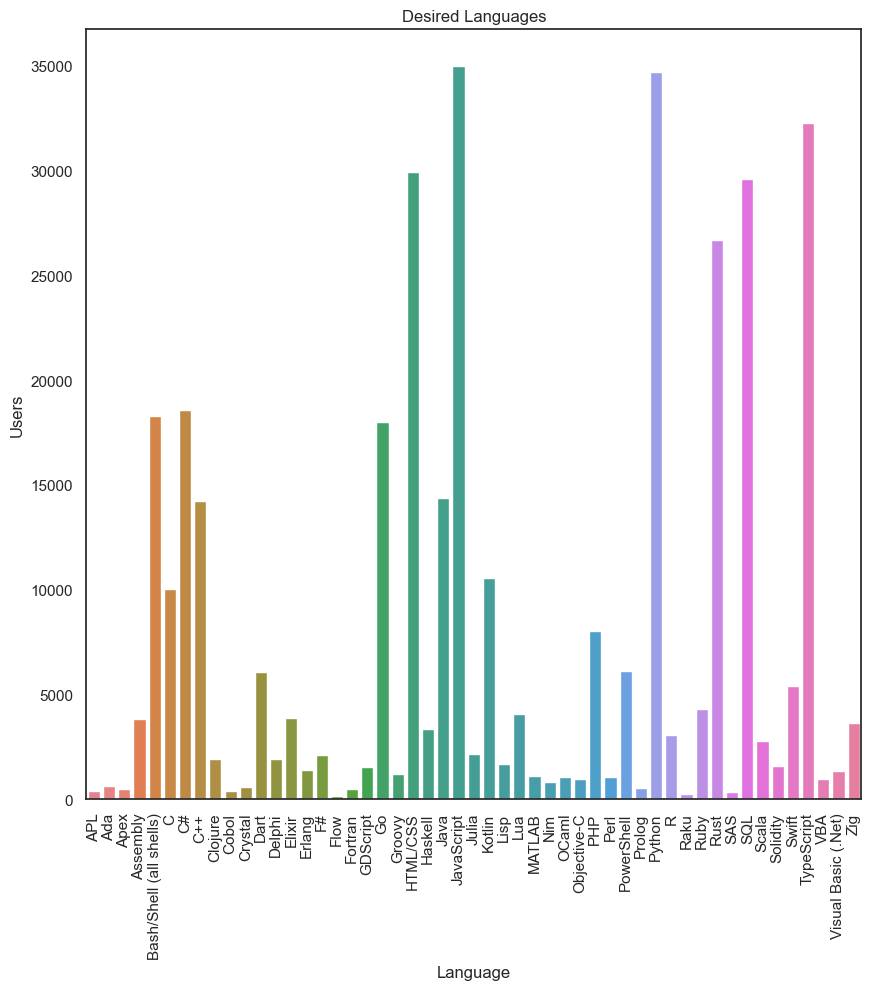

In [20]:
graph = sns.barplot(data=desired_df, x='Language', y='Count', hue='Language')
graph.set_xticks(graph.get_xticks())
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_ylabel('Users')
graph.set_title('Desired Languages')
plt.show()

## Is there a correlation between the users and desired users?

In [22]:
users_df['Count'].corr(desired_df['Count'])

0.42587787697026797

# Realizing that I don't need more than one data set

In [24]:
archive = zf.ZipFile('../data/JetBrainsSurvey2023.zip')
file = archive.open('survey.csv')
jbdf = pd.read_csv(file, low_memory=False)

In [25]:
jbdf.columns.tolist()

['response_id',
 'weight',
 'employment_status',
 'job_role::Architect',
 'job_role::Business Analyst',
 'job_role::CIO / CEO / CTO',
 'job_role::DBA',
 'job_role::Data Analyst / Data Engineer/ Data Scientist',
 'job_role::DevOps Engineer / Infrastructure Developer',
 'job_role::Developer / Programmer /  Software Engineer',
 'job_role::Developer Advocate',
 'job_role::Instructor / Teacher / Tutor',
 'job_role::Other',
 'job_role::Product Manager / Marketing Manager',
 'job_role::Systems Analyst',
 'job_role::Team Lead',
 'job_role::Technical Support',
 'job_role::Technical Writer',
 'job_role::Tester / QA Engineer',
 'job_role::UX / UI Designer',
 'position_level',
 'os_devenv::Linux',
 'os_devenv::Other',
 'os_devenv::Windows',
 'os_devenv::macOS',
 'activities_kinds::Academic Research',
 'activities_kinds::Business Intelligence',
 'activities_kinds::Code Reviewing',
 'activities_kinds::Coding / Programming',
 'activities_kinds::Data Analysis',
 'activities_kinds::Data Engineering',
 

Under the "adopt_proglang" topic, almost every column will be used

In [27]:
jbdf.head(10)

response_id    weight                                  employment_status  \
0        010A  0.401865  Self-employed <em>(a person earning income dir...   
1        011A  2.001889         Fully employed by a company / organization   
2        012q  3.521780         Fully employed by a company / organization   
3        014n  0.206694         Fully employed by a company / organization   
4        015A  3.491041         Fully employed by a company / organization   
5        0161  0.656234         Fully employed by a company / organization   
6        017Z  0.919496         Fully employed by a company / organization   
7        0181  0.932372                                            Student   
8        01Aq  0.773470                                            Student   
9        01DV  0.534602         Fully employed by a company / organization   

  job_role::Architect job_role::Business Analyst job_role::CIO / CEO / CTO  \
0                 NaN                        NaN           CIO / CEO / CTO   
1                 NaN                        NaN                       NaN   
2                 NaN                        NaN                       NaN   
3           Architect                        NaN                       NaN   
4                 NaN                        NaN                       NaN   
5                 NaN                        NaN                       NaN   
6           Architect                        NaN                       NaN   
7                 NaN                        NaN                       NaN   
8                 NaN                        NaN                       NaN   
9                 NaN                        NaN                       NaN   

  job_role::DBA job_role::Data Analyst / Data Engineer/ Data Scientist  \
0           NaN                                                NaN       
1           NaN                                                NaN       
2           NaN                                                NaN       
3           NaN                                                NaN       
4           NaN                                                NaN       
5           NaN                                                NaN       
6           NaN                                                NaN       
7           NaN                                                NaN       
8           NaN                                                NaN       
9           NaN                                                NaN       

  job_role::DevOps Engineer / Infrastructure Developer  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     
5                                                NaN     
6         DevOps Engineer / Infrastructure Developer     
7                                                NaN     
8                                                NaN     
9                                                NaN     

  job_role::Developer / Programmer /  Software Engineer  \
0        Developer / Programmer /  Software Engineer      
1                                                NaN      
2        Developer / Programmer /  Software Engineer      
3                                                NaN      
4        Developer / Programmer /  Software Engineer      
5        Developer / Programmer /  Software Engineer      
6        Developer / Programmer /  Software Engineer      
7                                                NaN      
8                                                NaN      
9        Developer / Programmer /  Software Engineer      

  job_role::Developer Advocate job_role::Instructor / Teacher / Tutor  \
0                          NaN                                    NaN   
1                          NaN    

In [28]:
jbdf.shape

(26348, 4672)

In [29]:
jbdf.describe()

weight  activities_kinds::None  agile_framework::None  \
count  26348.000000                     0.0                    0.0   
mean       1.000000                     NaN                    NaN   
std        0.929248                     NaN                    NaN   
min        0.016368                     NaN                    NaN   
25%        0.419361                     NaN                    NaN   
50%        0.641010                     NaN                    NaN   
75%        1.304939                     NaN                    NaN   
max        9.624574                     NaN                    NaN   

       jb_prod_use::None  jb_prod_exp::None  proglang_rank::Assembly  \
count                0.0                0.0                73.000000   
mean                 NaN                NaN                 2.164384   
std                  NaN                NaN                 0.850060   
min                  NaN                NaN                 1.000000   
25%                  NaN                NaN                 1.000000   
50%                  NaN                NaN                 2.000000   
75%                  NaN                NaN                 3.000000   
max                  NaN                NaN                 3.000000   

       proglang_rank::C  proglang_rank::C#  proglang_rank::C++  \
count       1124.000000        3676.000000         2593.000000   
mean           1.952847           1.523395            1.757809   
std            0.802101           0.772132            0.820716   
min            1.000000           1.000000            1.000000   
25%            1.000000           1.000000            1.000000   
50%            2.000000           1.000000            2.000000   
75%            3.000000           2.000000            2.000000   
max            3.000000           3.000000            3.000000   

       proglang_rank::COBOL  proglang_rank::Clojure / ClojureScript  \
count             31.000000                               72.000000   
mean               1.612903                                1.791667   
std                0.803219                                0.902852   
min                1.000000                                1.000000   
25%                1.000000                                1.000000   
50%                1.000000                                1.000000   
75%                2.000000                                3.000000   
max                3.000000                                3.000000   

       proglang_rank::CoffeeScript  proglang_rank::Dart  \
count                    17.000000           664.000000   
mean                      1.529412             1.899096   
std                       0.624264             0.829544   
min                       1.000000             1.000000   
25%                       1.000000             1.000000   
50%                       1.000000             2.000000   
75%                       2.000000             3.000000   
max                       3.000000             3.000000   

       proglang_rank::Delphi  proglang_rank::Elixir  proglang_rank::F#  \
count              99.000000              86.000000          50.000000   
mean                1.575758               1.662791           1.840000   
std                 0.796560               0.806014           0.765586   
min                 1.000000               1.000000           1.000000   
25%                 1.000000               1.000000           1.000000   
50%                 1.000000               1.000000           2.000000   
75%                 2.000000               2.000000           2.000000   
max                 3.000000               3.000000           3.000000   

       proglang_rank::Go  proglang_rank::GraphQL  proglang_rank::Groovy  \
count        1918.000000              187.000000             162.000000   
mean            1.818040                2.358289               2.012346   
std             0.834661                0.634978               0.722209   